In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carlsbad
Processing Record 2 of Set 1 | sinkat
City not found. Skipping...
Processing Record 3 of Set 1 | carutapera
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | hambantota
Processing Record 8 of Set 1 | lebork
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | kavieng
Processing Record 13 of Set 1 | manzhouli
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | canto do buriti
Processing Record 16 of Set 1 | xining
Processing Record 17 of Set 1 | taoudenni
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | waupun
Processing Record 20 of Set 1 | lata
Processing Record 21 of Set 1 | korla
Processing Record 22 of Set 1 | rikitea
Processing Record 23

Processing Record 38 of Set 4 | moussoro
Processing Record 39 of Set 4 | praia da vitoria
Processing Record 40 of Set 4 | kifri
Processing Record 41 of Set 4 | kiama
Processing Record 42 of Set 4 | sitka
Processing Record 43 of Set 4 | fare
Processing Record 44 of Set 4 | oriximina
Processing Record 45 of Set 4 | ilulissat
Processing Record 46 of Set 4 | paamiut
Processing Record 47 of Set 4 | richards bay
Processing Record 48 of Set 4 | provideniya
Processing Record 49 of Set 4 | thompson
Processing Record 50 of Set 4 | kirkwall
Processing Record 1 of Set 5 | solsvik
City not found. Skipping...
Processing Record 2 of Set 5 | hay river
Processing Record 3 of Set 5 | adrar
Processing Record 4 of Set 5 | barrow
Processing Record 5 of Set 5 | morondava
Processing Record 6 of Set 5 | vardo
Processing Record 7 of Set 5 | hasaki
Processing Record 8 of Set 5 | yellowknife
Processing Record 9 of Set 5 | katsuura
Processing Record 10 of Set 5 | metro
Processing Record 11 of Set 5 | bethel
Proce

Processing Record 28 of Set 8 | matagami
Processing Record 29 of Set 8 | aleksandrovsk-sakhalinskiy
Processing Record 30 of Set 8 | sao pedro do sul
Processing Record 31 of Set 8 | mairana
Processing Record 32 of Set 8 | ambalavao
Processing Record 33 of Set 8 | cuencame
Processing Record 34 of Set 8 | san pedro
Processing Record 35 of Set 8 | yerbogachen
Processing Record 36 of Set 8 | severo-kurilsk
Processing Record 37 of Set 8 | najran
Processing Record 38 of Set 8 | boa esperanca do sul
Processing Record 39 of Set 8 | okha
Processing Record 40 of Set 8 | noumea
Processing Record 41 of Set 8 | ongandjera
Processing Record 42 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 43 of Set 8 | omboue
Processing Record 44 of Set 8 | panacan
Processing Record 45 of Set 8 | san carlos de bariloche
Processing Record 46 of Set 8 | gorontalo
Processing Record 47 of Set 8 | byron bay
Processing Record 48 of Set 8 | ron
Processing Record 49 of Set 8 | bell ville
Processing R

Processing Record 14 of Set 12 | tessalit
Processing Record 15 of Set 12 | karwar
Processing Record 16 of Set 12 | khasan
Processing Record 17 of Set 12 | lubango
Processing Record 18 of Set 12 | barreirinhas
Processing Record 19 of Set 12 | moron
Processing Record 20 of Set 12 | nanpiao
Processing Record 21 of Set 12 | half moon bay
Processing Record 22 of Set 12 | gunnedah
Processing Record 23 of Set 12 | eureka
Processing Record 24 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 25 of Set 12 | inirida
Processing Record 26 of Set 12 | lockport
Processing Record 27 of Set 12 | boyolangu
Processing Record 28 of Set 12 | ambilobe
Processing Record 29 of Set 12 | pochutla
Processing Record 30 of Set 12 | puerto morazan
Processing Record 31 of Set 12 | kilindoni
Processing Record 32 of Set 12 | lazaro cardenas
Processing Record 33 of Set 12 | manadhoo
Processing Record 34 of Set 12 | shimoda
Processing Record 35 of Set 12 | pisco
Processing Record 36 of Set 12 | ma

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carlsbad,33.1581,-117.3506,61.86,63,0,8.05,US,2022-03-07 00:52:01
1,Carutapera,-1.1950,-46.0200,73.76,96,100,5.88,BR,2022-03-07 00:55:20
2,Atuona,-9.8000,-139.0333,78.84,76,27,11.72,PF,2022-03-07 00:55:20
3,New Norfolk,-42.7826,147.0587,64.92,37,83,3.18,AU,2022-03-07 00:51:34
4,Busselton,-33.6500,115.3333,73.04,63,1,15.95,AU,2022-03-07 00:55:21
5,Hambantota,6.1241,81.1185,75.54,100,20,1.14,LK,2022-03-07 00:55:21
6,Lebork,54.5392,17.7501,31.91,93,4,5.53,PL,2022-03-07 00:55:21
7,Punta Arenas,-53.1500,-70.9167,46.42,70,40,4.61,CL,2022-03-07 00:55:21
8,Chuy,-33.6971,-53.4616,69.96,91,100,5.12,UY,2022-03-07 00:55:22
9,Torbay,47.6666,-52.7314,24.76,71,40,6.91,CA,2022-03-07 00:55:22


In [9]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carlsbad,US,2022-03-07 00:52:01,33.1581,-117.3506,61.86,63,0,8.05
1,Carutapera,BR,2022-03-07 00:55:20,-1.1950,-46.0200,73.76,96,100,5.88
2,Atuona,PF,2022-03-07 00:55:20,-9.8000,-139.0333,78.84,76,27,11.72
3,New Norfolk,AU,2022-03-07 00:51:34,-42.7826,147.0587,64.92,37,83,3.18
4,Busselton,AU,2022-03-07 00:55:21,-33.6500,115.3333,73.04,63,1,15.95
5,Hambantota,LK,2022-03-07 00:55:21,6.1241,81.1185,75.54,100,20,1.14
6,Lebork,PL,2022-03-07 00:55:21,54.5392,17.7501,31.91,93,4,5.53
7,Punta Arenas,CL,2022-03-07 00:55:21,-53.1500,-70.9167,46.42,70,40,4.61
8,Chuy,UY,2022-03-07 00:55:22,-33.6971,-53.4616,69.96,91,100,5.12
9,Torbay,CA,2022-03-07 00:55:22,47.6666,-52.7314,24.76,71,40,6.91


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

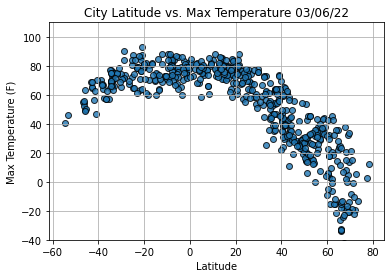

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(-40, 110)
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

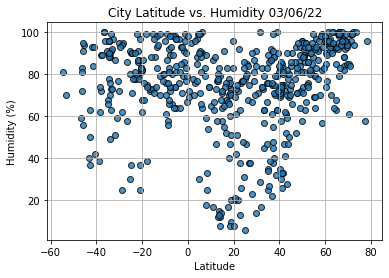

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

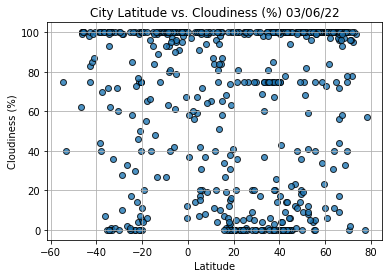

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

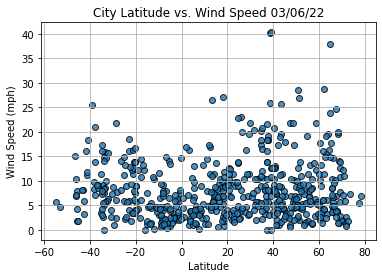

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City              Canto Do Buriti
Country                        BR
Date          2022-03-07 00:55:23
Lat                         -8.11
Lng                      -42.9444
Max Temp                    72.59
Humidity                       92
Cloudiness                     93
Wind Speed                   2.44
Name: 13, dtype: object

In [30]:
city_data_df[(city_data_df['Lat'] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carlsbad,US,2022-03-07 00:52:01,33.1581,-117.3506,61.86,63,0,8.05
5,Hambantota,LK,2022-03-07 00:55:21,6.1241,81.1185,75.54,100,20,1.14
6,Lebork,PL,2022-03-07 00:55:21,54.5392,17.7501,31.91,93,4,5.53
9,Torbay,CA,2022-03-07 00:55:22,47.6666,-52.7314,24.76,71,40,6.91
11,Manzhouli,CN,2022-03-07 00:55:22,49.6000,117.4333,19.24,72,20,4.59


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

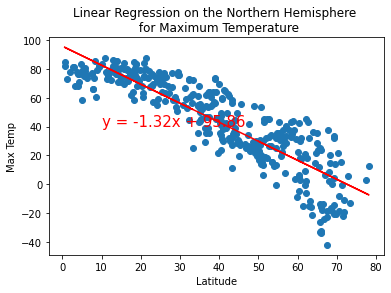

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

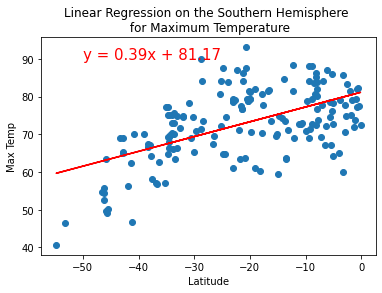

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

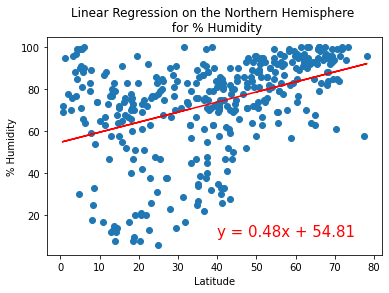

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

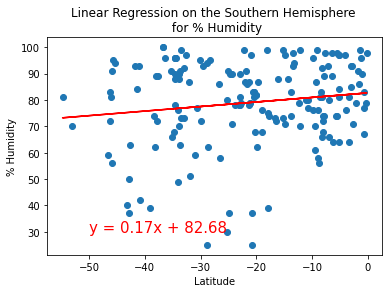

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,30))

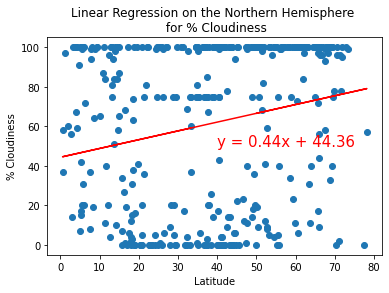

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,50))

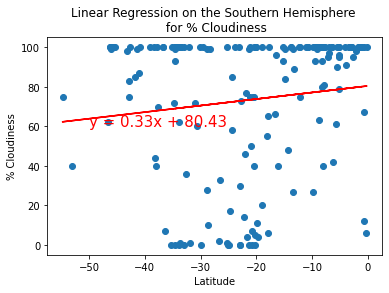

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

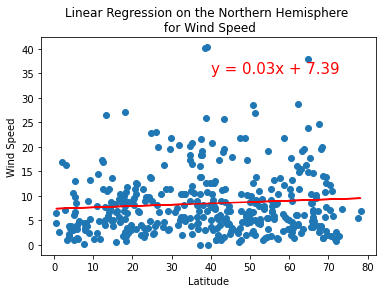

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

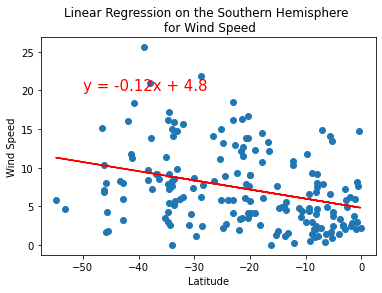

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))